In [7]:
!pip install xgboost
!pip install catboost


# Core Libraries
import numpy as np
import pandas as pd

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Boosting Libraries
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

# Data Splitting and Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Metrics for Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.1 MB/s eta 0:00:00


In [9]:
df = pd.read_csv('Superstore.csv', encoding='ISO-8859-1')

In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [11]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [12]:
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [13]:
import pandas as pd

def print_unique_values_sorted(df):

    unique_counts = [(column, df[column].nunique()) for column in df.columns]

    unique_counts_sorted = sorted(unique_counts, key=lambda x: x[1],reverse=True)

    for column, unique_count in unique_counts_sorted:
        print(f'{column} - {unique_count} unique values')


print_unique_values_sorted(df)

Row ID - 9994 unique values
Profit - 7287 unique values
Sales - 5825 unique values
Order ID - 5009 unique values
Product ID - 1862 unique values
Product Name - 1850 unique values
Ship Date - 1334 unique values
Order Date - 1237 unique values
Customer ID - 793 unique values
Customer Name - 793 unique values
Postal Code - 631 unique values
City - 531 unique values
State - 49 unique values
Sub-Category - 17 unique values
Quantity - 14 unique values
Discount - 12 unique values
Ship Mode - 4 unique values
Region - 4 unique values
Segment - 3 unique values
Category - 3 unique values
Country - 1 unique values


In [14]:
df = df.drop(columns=['Row ID', 'Order ID', 'Product ID', 'Customer ID'])

In [15]:
df

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,11/8/2016,11/11/2016,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,11/8/2016,11/11/2016,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,6/12/2016,6/16/2016,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,10/11/2015,10/18/2015,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,10/11/2015,10/18/2015,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,1/21/2014,1/23/2014,Second Class,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,2/26/2017,3/3/2017,Standard Class,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,2/26/2017,3/3/2017,Standard Class,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,2/26/2017,3/3/2017,Standard Class,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [16]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month
df['Order Day'] = df['Order Date'].dt.day
df['Order Weekday'] = df['Order Date'].dt.weekday

df['Ship Year'] = df['Ship Date'].dt.year
df['Ship Month'] = df['Ship Date'].dt.month
df['Ship Day'] = df['Ship Date'].dt.day
df['Ship Weekday'] = df['Ship Date'].dt.weekday



In [17]:
print_unique_values_sorted(df)

Profit - 7287 unique values
Sales - 5825 unique values
Product Name - 1850 unique values
Ship Date - 1334 unique values
Order Date - 1237 unique values
Customer Name - 793 unique values
Postal Code - 631 unique values
City - 531 unique values
State - 49 unique values
Order Day - 31 unique values
Ship Day - 31 unique values
Sub-Category - 17 unique values
Quantity - 14 unique values
Discount - 12 unique values
Order Month - 12 unique values
Ship Month - 12 unique values
Order Weekday - 7 unique values
Ship Weekday - 7 unique values
Ship Year - 5 unique values
Ship Mode - 4 unique values
Region - 4 unique values
Order Year - 4 unique values
Segment - 3 unique values
Category - 3 unique values
Country - 1 unique values


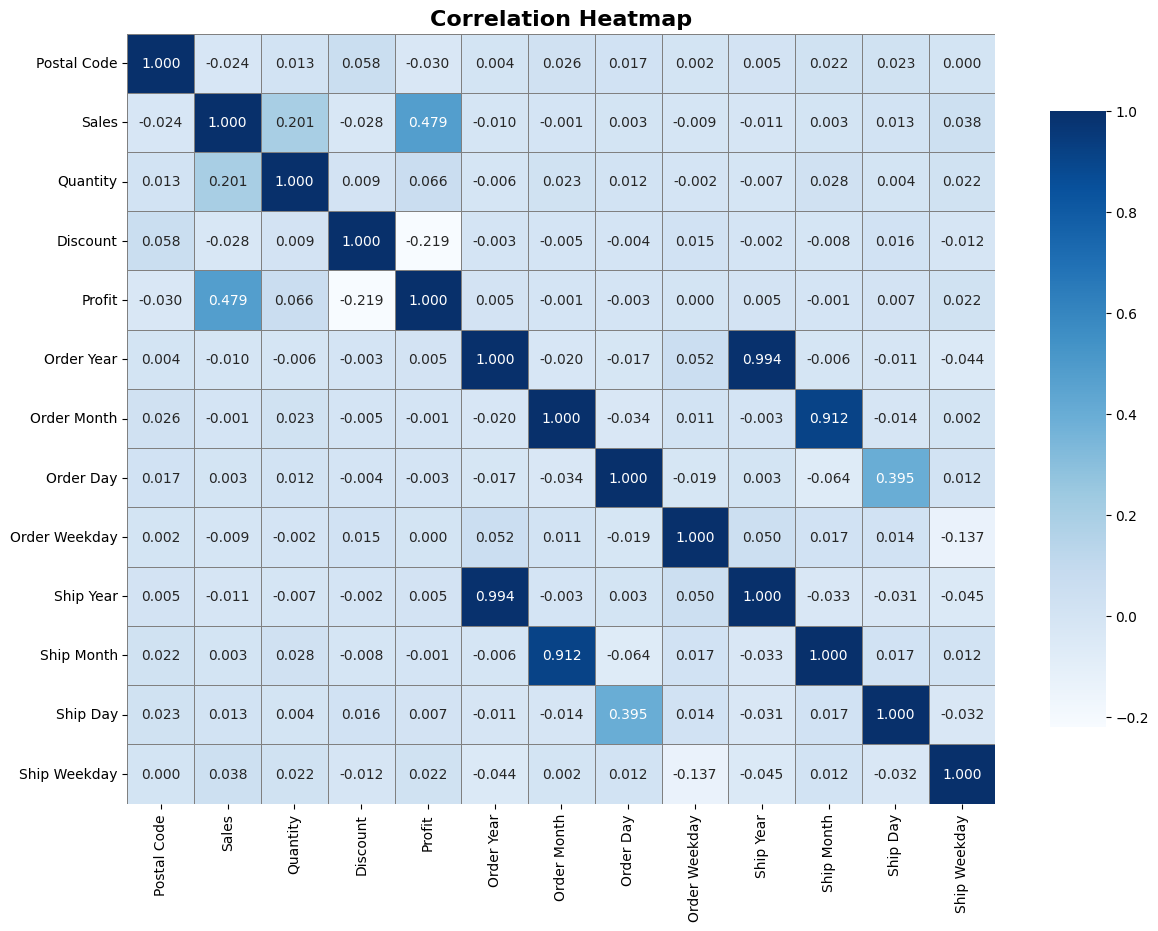

In [18]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, linewidths=0.5, linecolor='gray',
           cmap='Blues', fmt='.3f', cbar_kws={'shrink': 0.8, 'aspect': 11}, )
plt.title('Correlation Heatmap', fontsize=16, weight='bold');

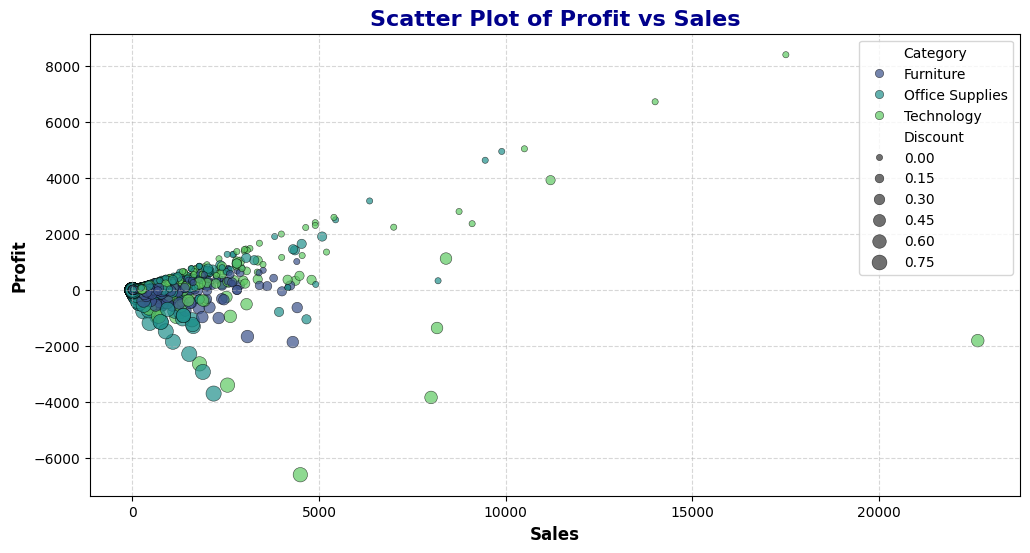

In [19]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df,y='Profit',x='Sales', hue='Category', palette='viridis',size='Discount',
               sizes=(20, 120), edgecolor='black',linewidth=0.4, alpha=0.7)

plt.title('Scatter Plot of Profit vs Sales', fontsize=16, weight='bold', color='darkblue')
plt.xlabel('Sales', fontsize=12, weight='bold')
plt.ylabel('Profit', fontsize=12, weight='bold')

plt.grid(True, linestyle='--', alpha=0.5)

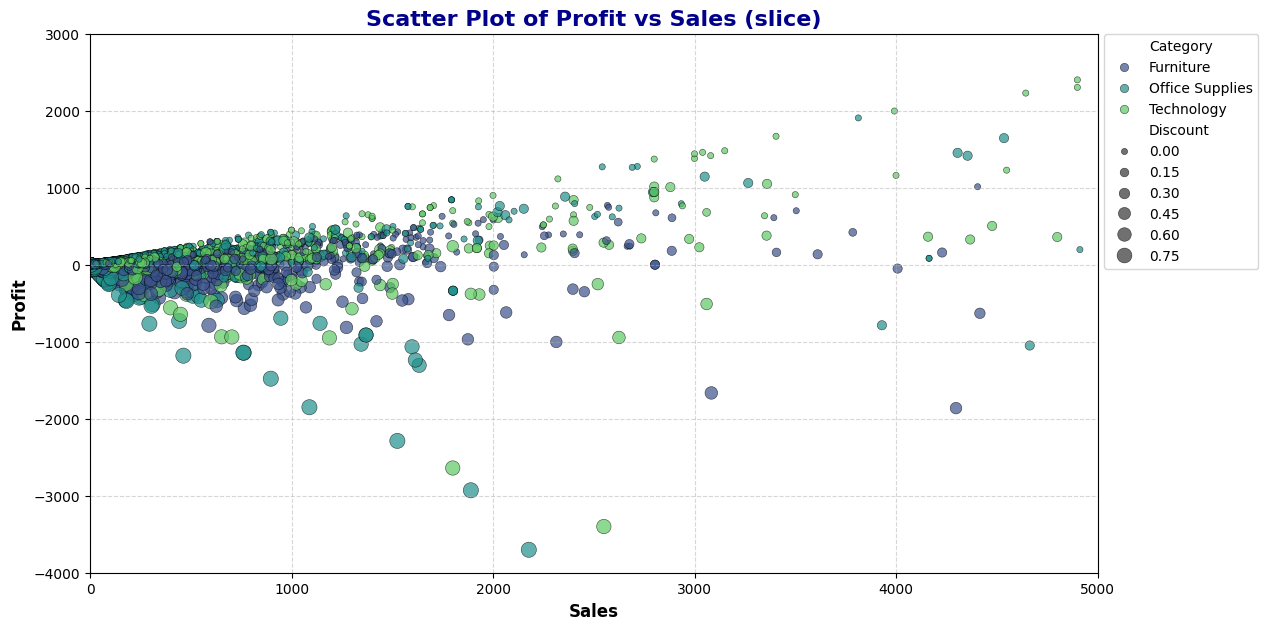

In [20]:
plt.figure(figsize=(13, 7))
sns.scatterplot(data=df, y='Profit', x='Sales', hue='Category', palette='viridis',size='Discount',
                sizes=(20, 120), edgecolor='black', linewidth=0.4,alpha=0.7)

plt.title('Scatter Plot of Profit vs Sales (slice)', fontsize=16, weight='bold', color='darkblue')
plt.xlabel('Sales', fontsize=12, weight='bold')
plt.ylabel('Profit', fontsize=12, weight='bold')

plt.xlim(0, 5000)
plt.ylim(-4000, 3000)

plt.legend(loc='upper left', bbox_to_anchor=(1, 1.012), fontsize=10)

plt.grid(True, linestyle='--', alpha=0.5)

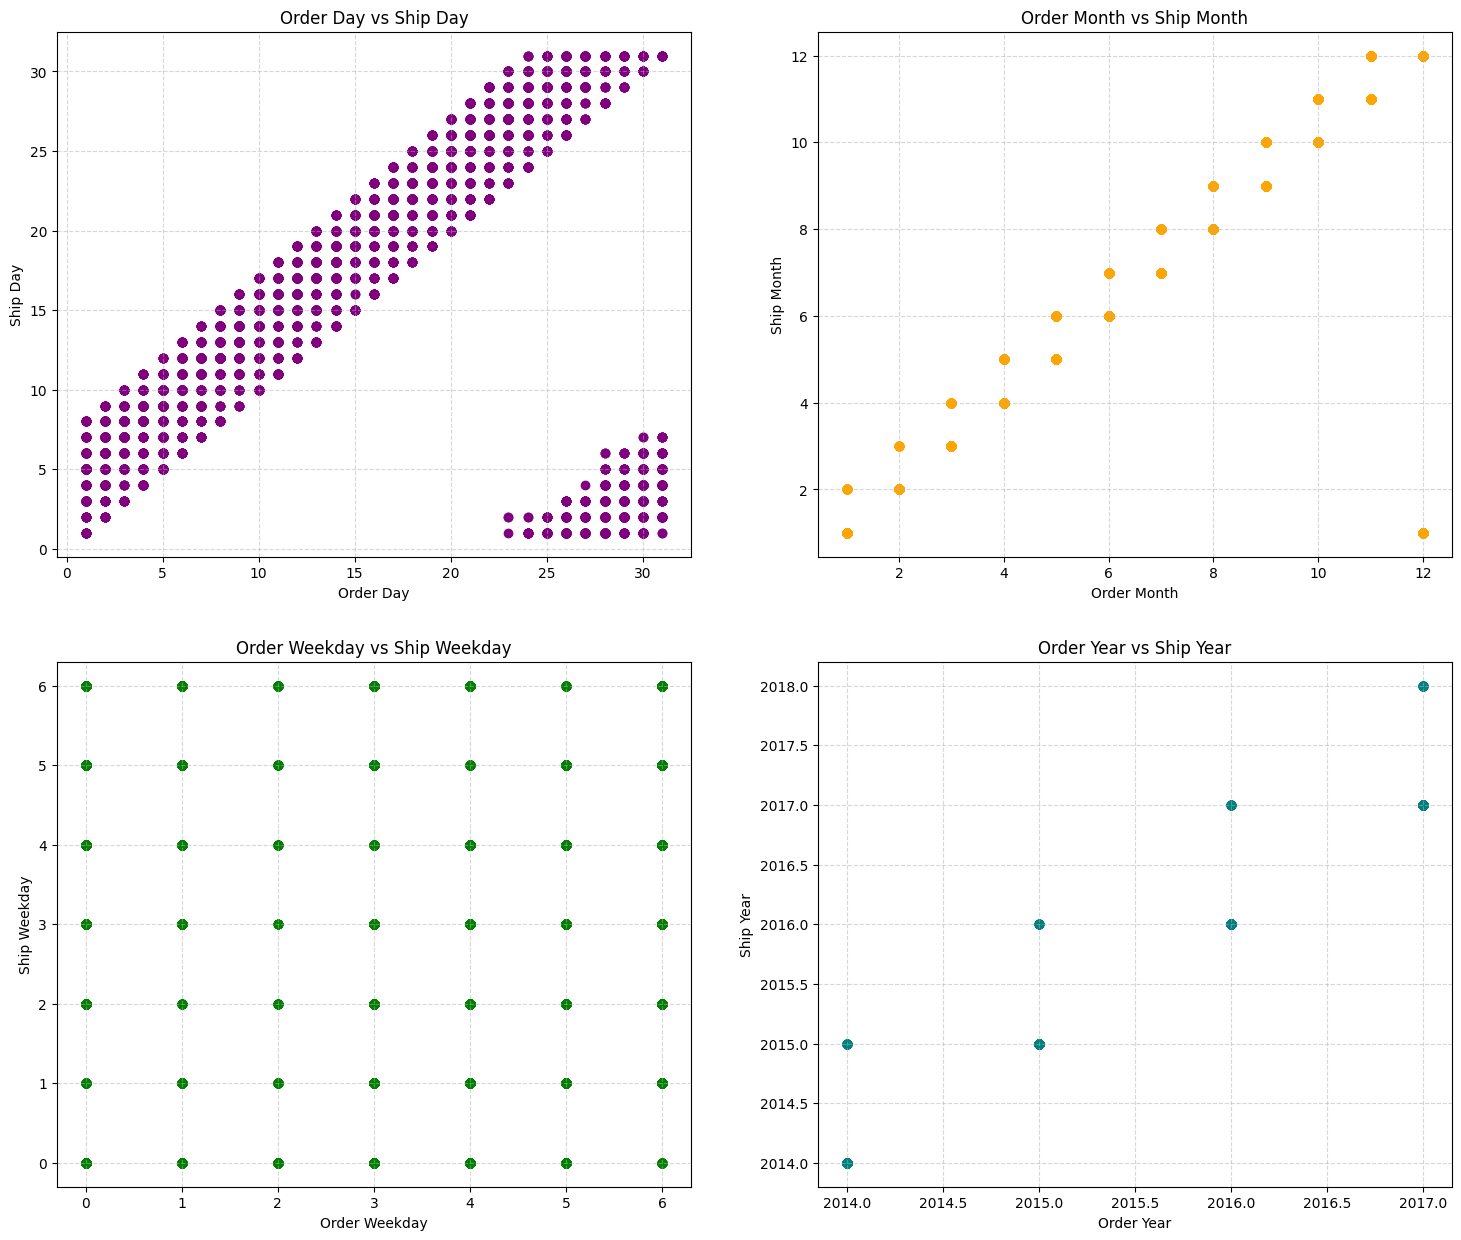

In [21]:
fig, axs = plt.subplots(2, 2, figsize=(18, 15))

axs[0, 0].scatter(df['Order Day'], df['Ship Day'], color='purple')
axs[0, 0].set_title('Order Day vs Ship Day')
axs[0, 0].set_xlabel('Order Day')
axs[0, 0].set_ylabel('Ship Day')
axs[0, 0].grid(True, linestyle='--', alpha=0.5)

axs[0, 1].scatter(df['Order Month'], df['Ship Month'], color='orange')
axs[0, 1].set_title('Order Month vs Ship Month')
axs[0, 1].set_xlabel('Order Month')
axs[0, 1].set_ylabel('Ship Month')
axs[0, 1].grid(True, linestyle='--', alpha=0.5)

axs[1, 0].scatter(df['Order Weekday'], df['Ship Weekday'], color='green')
axs[1, 0].set_title('Order Weekday vs Ship Weekday')
axs[1, 0].set_xlabel('Order Weekday')
axs[1, 0].set_ylabel('Ship Weekday')
axs[1, 0].grid(True, linestyle='--', alpha=0.5)

axs[1, 1].scatter(df['Order Year'], df['Ship Year'], color='teal')
axs[1, 1].set_title('Order Year vs Ship Year')
axs[1, 1].set_xlabel('Order Year')
axs[1, 1].set_ylabel('Ship Year')
axs[1, 1].grid(True, linestyle='--', alpha=0.5)

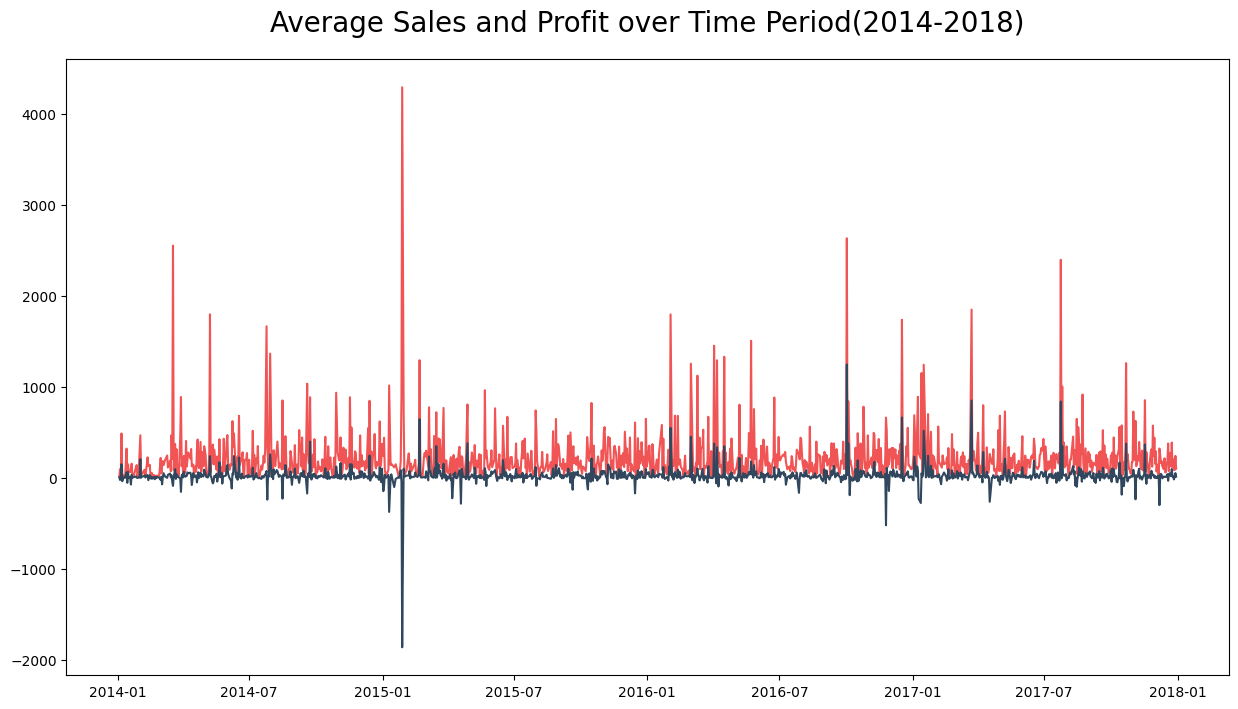

In [22]:
df_line = df[['Order Date','Sales','Profit']].sort_values('Order Date')
df_line = df_line.groupby('Order Date').mean()

plt.figure(figsize=[15,8])
plt.plot(df_line.index, 'Sales', data=df_line, color='#F05454')
plt.plot(df_line.index, 'Profit', data=df_line, color='#30475E')
plt.title("Average Sales and Profit over Time Period(2014-2018)", size=20, pad=20);

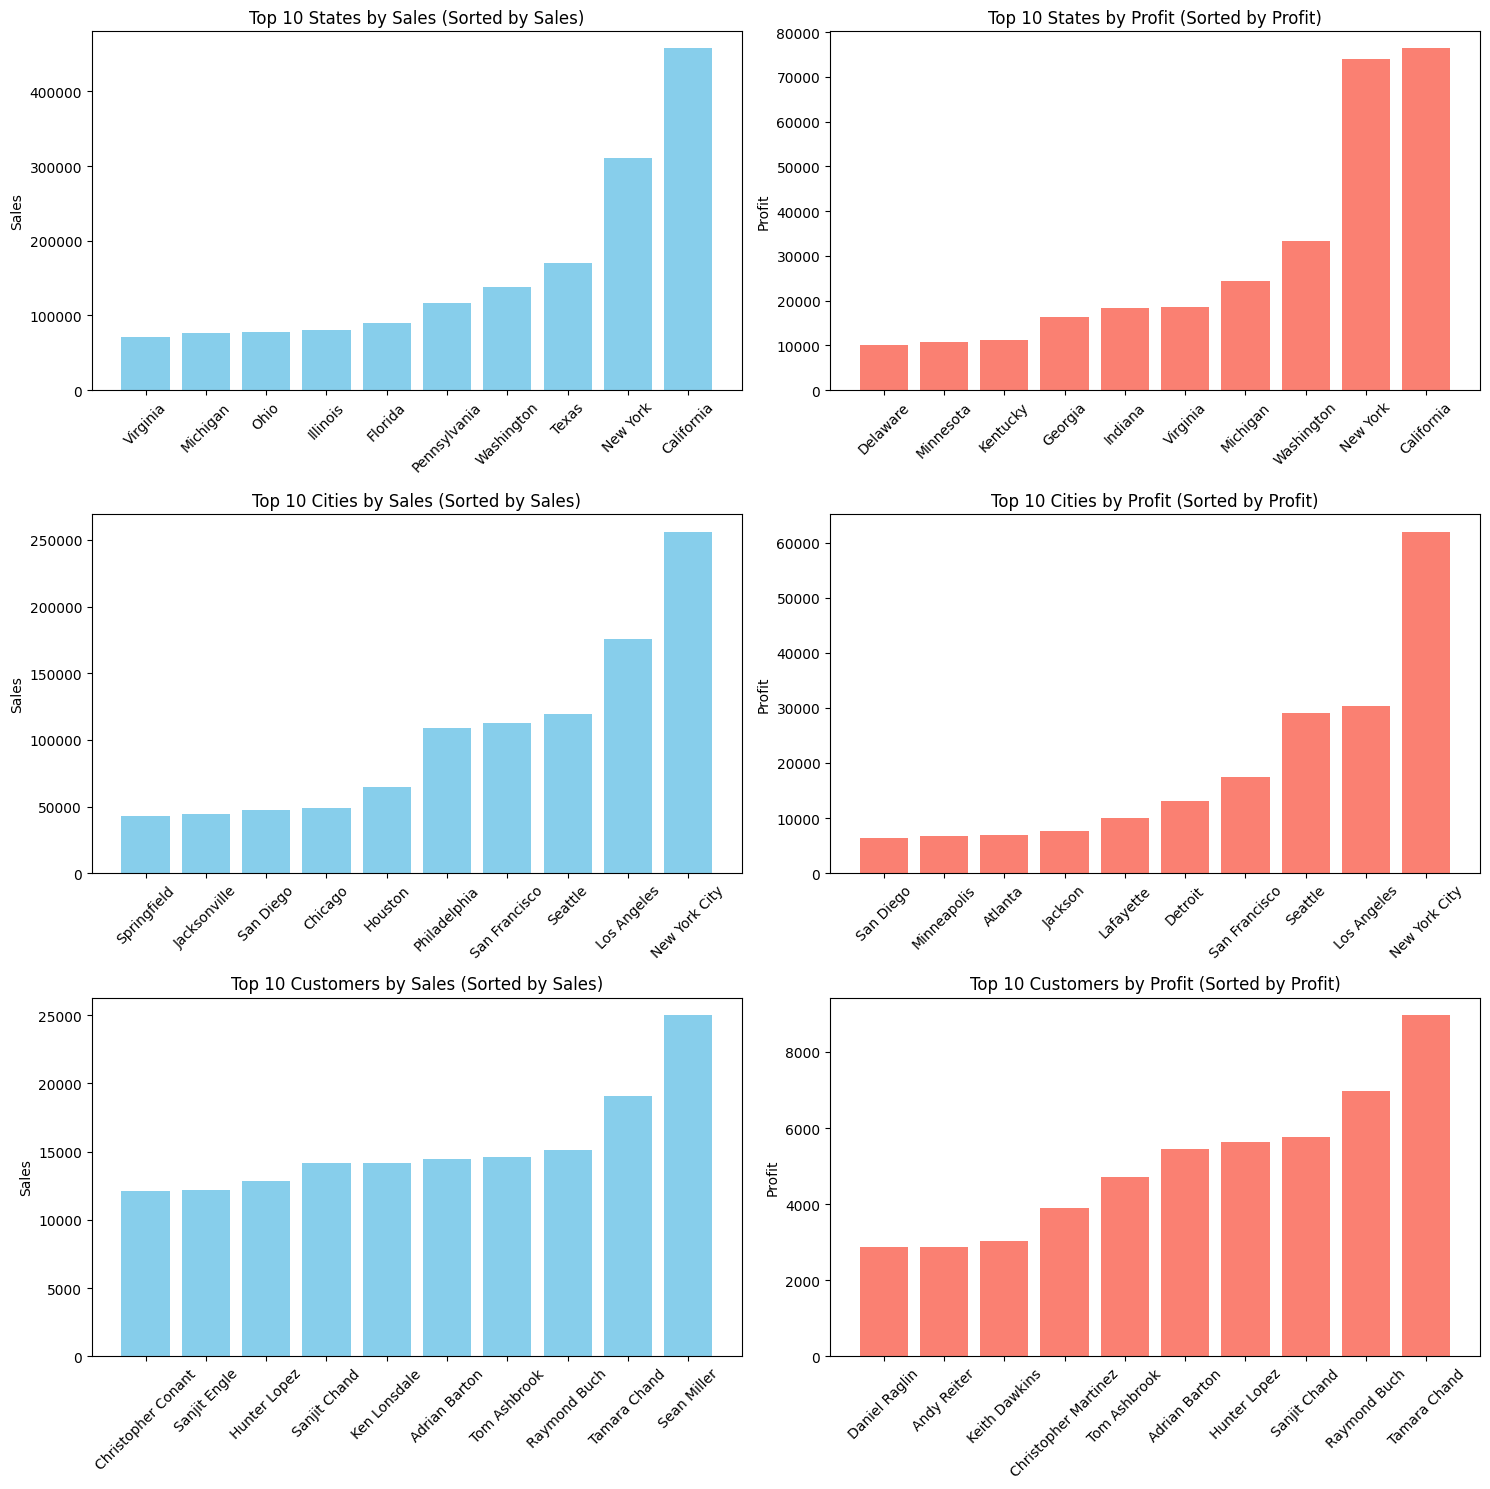

In [23]:
# Top 10 States by Sales and Profit
top_states_sorted_by_sales = df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(10).sort_values(ascending=True)  # Sorting by Sales
top_states_sorted_by_profit = df.groupby('State')['Profit'].sum().sort_values(ascending=False).head(10).sort_values(ascending=True)  # Sorting by Profit

# Top 10 Cities by Sales and Profit
top_cities_sorted_by_sales = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10).sort_values(ascending=True)  # Sorting by Sales
top_cities_sorted_by_profit = df.groupby('City')['Profit'].sum().sort_values(ascending=False).head(10).sort_values(ascending=True)  # Sorting by Profit

# Top 10 Customers by Sales and Profit
top_customers_sorted_by_sales = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(10).sort_values(ascending=True)  # Sorting by Sales
top_customers_sorted_by_profit = df.groupby('Customer Name')['Profit'].sum().sort_values(ascending=False).head(10).sort_values(ascending=True)  # Sorting by Profit

# Set up figure and axes for the subplots (3 rows, 2 columns)
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Bar plot for States sorted by Sales
axes[0, 0].bar(top_states_sorted_by_sales.index, top_states_sorted_by_sales, color='skyblue')
axes[0, 0].set_title('Top 10 States by Sales (Sorted by Sales)')
axes[0, 0].set_ylabel('Sales')
axes[0, 0].tick_params(axis='x', rotation=45)


# Bar plot for States sorted by Profit
axes[0, 1].bar(top_states_sorted_by_profit.index, top_states_sorted_by_profit, color='salmon')
axes[0, 1].set_title('Top 10 States by Profit (Sorted by Profit)')
axes[0, 1].set_ylabel('Profit')
axes[0, 1].tick_params(axis='x', rotation=45)

# Bar plot for Cities sorted by Sales
axes[1, 0].bar(top_cities_sorted_by_sales.index, top_cities_sorted_by_sales, color='skyblue')
axes[1, 0].set_title('Top 10 Cities by Sales (Sorted by Sales)')
axes[1, 0].set_ylabel('Sales')
axes[1, 0].tick_params(axis='x', rotation=45)

# Bar plot for Cities sorted by Profit
axes[1, 1].bar(top_cities_sorted_by_profit.index, top_cities_sorted_by_profit, color='salmon')
axes[1, 1].set_title('Top 10 Cities by Profit (Sorted by Profit)')
axes[1, 1].set_ylabel('Profit')
axes[1, 1].tick_params(axis='x', rotation=45)

# Bar plot for Customers sorted by Sales
axes[2, 0].bar(top_customers_sorted_by_sales.index, top_customers_sorted_by_sales, color='skyblue')
axes[2, 0].set_title('Top 10 Customers by Sales (Sorted by Sales)')
axes[2, 0].set_ylabel('Sales')
axes[2, 0].tick_params(axis='x', rotation=45)

# Bar plot for Customers sorted by Profit
axes[2, 1].bar(top_customers_sorted_by_profit.index, top_customers_sorted_by_profit, color='salmon')
axes[2, 1].set_title('Top 10 Customers by Profit (Sorted by Profit)')
axes[2, 1].set_ylabel('Profit')
axes[2, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()

In [24]:
X = df.drop(['Order Date', 'Ship Date', 'Customer Name', 'Country', 'Profit'],axis=1)
y = df['Profit']

numerical_cols = X.select_dtypes(include=['number']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca', PCA())
])


categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', numerical_transformer, numerical_cols),
        ('categorical', categorical_transformer, categorical_cols)
    ]
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBRegressor())
])

param_grid = {
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__n_estimators': [100, 200],
    'model__max_depth': [3, 4, 5],
    'model__subsample': [0.8, 0.9, 1.0],

}

grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

predictions = best_model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import median_absolute_error

MAE = mean_absolute_error(y_test, predictions)
MSE = mean_squared_error(y_test, predictions)
RMSE = np.sqrt(MSE)
r2 = r2_score(y_test, predictions)
MedAE = median_absolute_error(y_test, predictions)

print(f"MedAE: {MedAE}")
print(f"MAE: {MAE}")
print(f"MSE: {MSE}")
print(f"RMSE: {RMSE}")
print(f"R^2 Score: {r2}")
print(f"Best Parameters: {grid_search.best_params_}")

MedAE: 16.553299673461915
MAE: 36.59147146344293
MSE: 15606.338269717624
RMSE: 124.92533077689899
R^2 Score: 0.6313265175638036
Best Parameters: {'model__learning_rate': 0.2, 'model__max_depth': 3, 'model__n_estimators': 200, 'model__subsample': 0.8}


In [ ]:
X = df.drop(['Order Date', 'Ship Date', 'Customer Name', 'Country', 'Profit'], axis=1)
y = df['Profit']

numerical_cols = X.select_dtypes(include=['number']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

for col in categorical_cols:
    X[col] = X[col].astype('category')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

model = CatBoostRegressor(silent=True)

param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200],
    'depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
}

cat_features_indices = [X.columns.get_loc(col) for col in categorical_cols]

grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train, cat_features=cat_features_indices)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

predictions = best_model.predict(X_test)

MAE = mean_absolute_error(y_test, predictions)
MSE = mean_squared_error(y_test, predictions)
RMSE = np.sqrt(MSE)
r2 = r2_score(y_test, predictions)
MedAE = median_absolute_error(y_test, predictions)

print(f"MedAE: {MedAE}")
print(f"MAE: {MAE}")
print(f"MSE: {MSE}")
print(f"RMSE: {RMSE}")
print(f"R^2 Score: {r2}")
print(f"Best Parameters: {grid_search.best_params_}")

MedAE: 8.408562506430107
MAE: 22.066134678524726
MSE: 6631.228360536662
RMSE: 81.43235450689524
R^2 Score: 0.8433483876706361
Best Parameters: {'depth': 3, 'learning_rate': 0.2, 'n_estimators': 200, 'subsample': 1.0}
